In [10]:

# Using the 200 stocks x 504 days of trading price (derived from normal distribution). 
# We are going to use the last 50 days of data as test data
# If we pick the 3 stocks that has the most drop within the first 454 days, if we buy in at day 454, what would happen?

import numpy as np

stock_day_change = np.load('./gen/stock_day_change.npy')

# 200 stocks
stock_cnt = 200

# 504 trade days
view_days = 504

# 50 days as test period
keep_days = 50


In [11]:

stock_day_change_learn = stock_day_change[:stock_cnt, :view_days - keep_days]

print(np.sort(np.sum(stock_day_change_learn, axis=1))[:3])

worst_stock_array = np.argsort(np.sum(stock_day_change_learn, axis=1))[:3]

worst_stock_array

[-49.03195683 -44.96767407 -44.5725062 ]


array([ 72, 147, 130])

In [12]:

from matplotlib import pyplot as plt

def show_buy_lower(stock_ind):
    """
    :param stock_ind: Stock Index in stock_day_change 
    :return: 
    """
    _, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
    
    axs[0].plot(np.arange(0, view_days - keep_days),
                stock_day_change_learn[stock_ind].cumsum())
    
    cs_buy = stock_day_change[stock_ind][view_days - keep_days:view_days].cumsum()
    axs[1].plot(np.arange(view_days - keep_days, view_days), cs_buy)
    
    return cs_buy[-1]

Bought stocks [ 72 147 130], from day 454: -11.26%


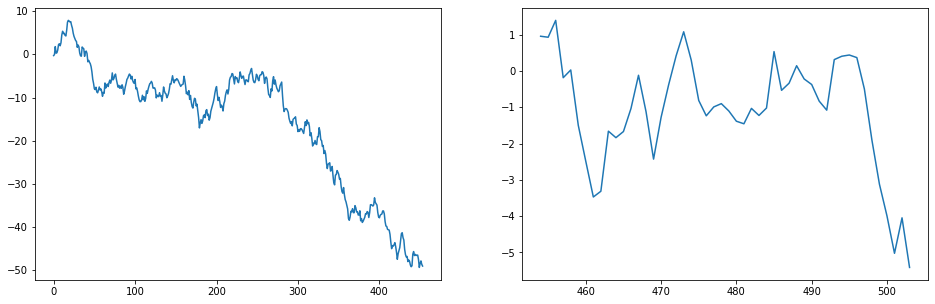

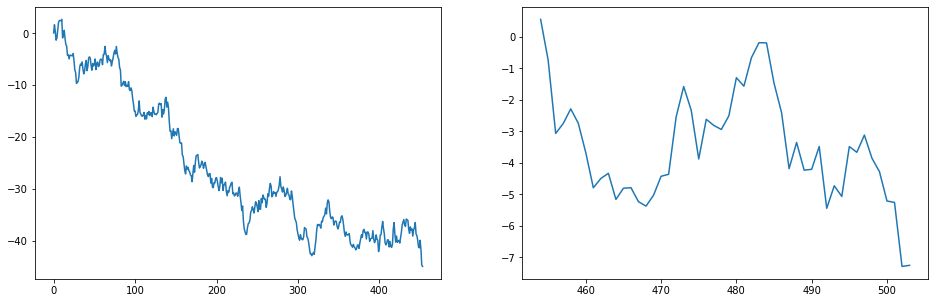

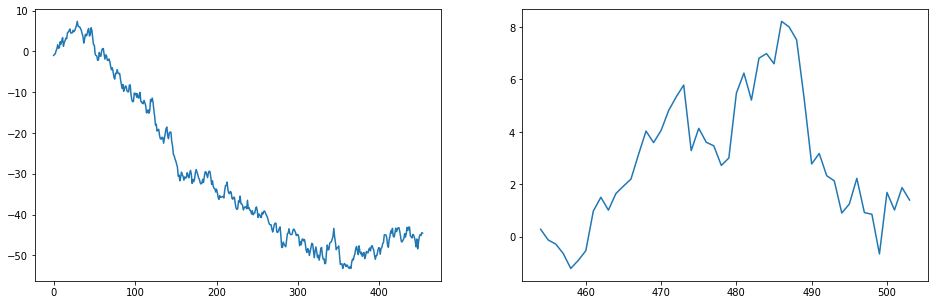

In [13]:

profit = 0

for stock_ind in worst_stock_array:
    profit += show_buy_lower(stock_ind)
    
print('Bought stocks {}, from day 454: {:.2f}%'.format(worst_stock_array, profit))